In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
meta = pd.read_csv("series-networks/meta.csv")
edgelist = pd.read_csv("series-networks/gameofthrones/edges.csv")
attr = pd.read_csv("series-networks/gameofthrones/attributes.csv")

In [3]:
"""def extract_first_house(s):
    match = re.search(r'([A-Z][a-z]*)(?=[A-Z]|[\[\]\s]|$)', s)
    if match:
        return match.group(1)
    else:
        return None"""

"def extract_first_house(s):\n    match = re.search(r'([A-Z][a-z]*)(?=[A-Z]|[\\[\\]\\s]|$)', s)\n    if match:\n        return match.group(1)\n    else:\n        return None"

In [4]:
"""house_df = attr[attr["house"].notna()]
house_df.loc[:, "house_clean"] = house_df["house"].apply(extract_first_house)
#house_df["house_clean"].unique()"""

'house_df = attr[attr["house"].notna()]\nhouse_df.loc[:, "house_clean"] = house_df["house"].apply(extract_first_house)\n#house_df["house_clean"].unique()'

Csak nagy házakra megcsinálni

In [5]:
major_houses = ["Targaryen", "Stark", "Lannister",
                "Baratheon", "Greyjoy", "Tully",
                "Arryn", "Martell", "Tyrell"]

In [6]:
def find_major_house(houses):
    """
    Returns first major house it encounters in houses

    Splits houses str by whitespaces upon non-alphanumeric chars and uppercase letters
    """
    for house in houses:
        cleaned_house = ''
        
        for i, char in enumerate(house):
            if i == 0:
                cleaned_house += char
            elif char.isupper():
                cleaned_house += " " + char
            elif not char.isalpha():
                cleaned_house += " " + char
            else:
                cleaned_house += char
        
        house_names = cleaned_house.split()
        
        for name in house_names:
            if name in major_houses:
                return name
    
    return None


In [7]:
house_df = attr[attr["house"].notna()]
house_df["major_house"] = house_df["house"].str.split().apply(find_major_house)
house_df = house_df[house_df["major_house"].notna()]
#house_df[house_df["house"] == "FreyTully (by marriage)"]
display(house_df)

C:\Users\aronn\AppData\Local\Temp\ipykernel_8736\3262595721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df["major_house"] = house_df["house"].str.split().apply(find_major_house)


,id,title,image,birth,death,house,affiliation,titles,culture,father,...,spouse,religion,issue,aka,arms,species,lovers,siblings,family,major_house
0,Aemon,Aemon,NaN,"Aemon Targaryen[1]202 AC[a]Red Keep, King's La...","302 AC[c] (aged 100)Castle Black, the Gift[2]",Targaryen[1] (renounced),Order of Maesters[3]Night's Watch[3],Prince[1] (formerly)Maester[3],Valyrian[1],{Maekar I Targaryen}[1],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Targaryen
10,Jon_Arryn,Jon Arryn,NaN,"The Eyrie, the Vale of Arryn[a]","298 AC[b]Red Keep, King's Landing[1]",Arryn[1],House Targaryen[2] (formerly)House Baratheon o...,Lord of the EyrieDefender of the ValeWarden of...,Valemen[1],{Jasper Arryn}[citation needed],...,{Lysa Tully}[1],Faith of the Seven[1],Robin Arryn[1],NaN,NaN,NaN,NaN,NaN,NaN,Arryn
11,Lysa_Arryn,Lysa Arryn,NaN,"Lysa Tully[1]Riverrun, the Riverlands[a]","301 AC[b]The Eyrie, the Vale of Arryn[2]",Tully[1]Arryn[3] (by marriage)Baelish[4] (by m...,NaN,NaN,Rivermen[1],{Hoster Tully}[5],...,{Jon Arryn}[3] (1st husband){Petyr Baelish}[4]...,Faith of the Seven[4],Robin Arryn[3],NaN,NaN,NaN,NaN,NaN,NaN,Tully
12,Robin_Arryn,Robin Arryn,NaN,"289 AC[a] (age 16)[b]Red Keep, King's Landing[c]",NaN,Arryn[1],House Royce[2] (ward),Lord of the Eyrie[3]Defender of the Vale[4]War...,Valemen[3],{Jon Arryn}[1],...,NaN,NaN,NaN,Sweetrobin[3],NaN,NaN,NaN,NaN,NaN,Arryn
23,Edric_Baratheon,Edric Baratheon,NaN,"Dragonstone, the Crownlands[1]","Dragonstone, the Crownlands[1]",Baratheon of Dragonstone[1],NaN,NaN,NaN,{Stannis Baratheon}[1],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Baratheon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,Tyrell_lady,Tyrell lady,NaN,At Highgarden,303 AC[a] in King's LandingIncinerated in a wi...,Tyrell,NaN,NaN,Andal,NaN,...,NaN,Faith of the Seven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tyrell
535,Loras_Tyrell,Loras Tyrell,NaN,"Highgarden, the Reach[a]","Festival of the Mother,[1] 303 AC[b]Great Sept...",Tyrell[3] (renounced)[2],House Baratheon[4] (formerly)Kingsguard of Ren...,Ser[3]Lord Commander of the Kingsguard[4] (for...,Reach[3],{Mace Tyrell}[5],...,NaN,Faith of the Seven[2],NaN,The Knight of the Flowers[3]Brother Loras[2],NaN,NaN,{Renly Baratheon}[3]Olyvar[7],NaN,NaN,Tyrell
536,Mace_Tyrell,Mace Tyrell,NaN,At Highgarden,303 AC[a] in King's LandingIncinerated in a wi...,Tyrell,House Targaryen (formerly)House Baratheon of K...,Lord of HighgardenLord Paramount of the ReachW...,Andal,{Luthor Tyrell},...,{Alerie Hightower},Faith of the Seven,NaN,The Lord Oaf of HighgardenThe Fat Flower,NaN,NaN,NaN,{Sisters},NaN,Tyrell
537,Margaery_Tyrell,Margaery Tyrell,NaN,"Highgarden, the Reach[a]","Festival of the Mother,[1] 303 AC[b]Great Sept...",Tyrell[3]Baratheon[3] (by marriage)Baratheon o...,NaN,Queen Consort[4],Reach[3],{Mace Tyrell}[4],...,{Renly Baratheon}[3] (1st husband; unconsummat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tyrell


In [8]:
edgelist = edgelist[edgelist["from"] != edgelist["to"]]

In [9]:
id_house = dict(zip(house_df["id"], house_df["major_house"]))

houses_edgelist = edgelist
houses_edgelist["from_house"] = houses_edgelist["from"].map(id_house)
houses_edgelist["to_house"] = houses_edgelist["to"].map(id_house)

houses_edgelist.dropna(inplace=True)
#houses_edgelist = houses_edgelist.drop(["from", "to"], axis=1)
houses_edgelist[houses_edgelist["from_house"] == "Baratheon"].head(150)
len(houses_edgelist)

1309

In [10]:
heatmap_data = pd.DataFrame(0, index=major_houses, columns=major_houses)

for _, row in houses_edgelist.iterrows():
    heatmap_data.loc[row["from_house"], row["to_house"]] += 1

heatmap_data

,Targaryen,Stark,Lannister,Baratheon,Greyjoy,Tully,Arryn,Martell,Tyrell
Targaryen,30,32,19,20,5,4,3,3,4
Stark,39,91,36,31,11,45,13,2,10
Lannister,17,42,90,45,12,17,3,8,26
Baratheon,29,34,52,129,10,7,4,7,25
Greyjoy,8,13,10,12,20,2,0,0,3
Tully,6,41,20,7,2,30,10,0,1
Arryn,3,10,6,6,0,9,2,0,0
Martell,6,5,10,6,3,1,1,12,3
Tyrell,5,11,21,23,1,3,0,2,20


Biztos, hogy jó az edgelist?

Standardize

In [11]:
def standardize(df, N):
    #N = len(df)
    stand_df = df.copy()
    stand_df = stand_df.astype(float)

    for row_i, row in df.iterrows():
        row_sum = row.sum()

        for col_i, cell_value in enumerate(row):
            col_sum = df.iloc[:, col_i].sum()
            stand_df.iloc[row_i, col_i] = (cell_value * N) / (row_sum * col_sum)

    return stand_df
    #new_cell_value = (cell_value * N)


heatmap_data = standardize(heatmap_data, len(edgelist))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [13]:
def standardize_(df, N):
    row_sums = df.sum(axis=1)
    col_sums = df.sum(axis=0)
    denominator = row_sums.values.reshape(-1, 1) * col_sums.values.reshape(1, -1)
    print(denominator)
    print(row_sums)
    print(col_sums)
    
    return (df * N) / denominator

stand_heatmap_data = standardize_(heatmap_data, len(edgelist))

[[17160 33480 31680 33480  7680 14160  4320  4080 11040]
 [39754 77562 73392 77562 17792 32804 10008  9452 25576]
 [37180 72540 68640 72540 16640 30680  9360  8840 23920]
 [42471 82863 78408 82863 19008 35046 10692 10098 27324]
 [ 9724 18972 17952 18972  4352  8024  2448  2312  6256]
 [16731 32643 30888 32643  7488 13806  4212  3978 10764]
 [ 5148 10044  9504 10044  2304  4248  1296  1224  3312]
 [ 6721 13113 12408 13113  3008  5546  1692  1598  4324]
 [12298 23994 22704 23994  5504 10148  3096  2924  7912]]
Targaryen    120
Stark        278
Lannister    260
Baratheon    297
Greyjoy       68
Tully        117
Arryn         36
Martell       47
Tyrell        86
dtype: int64
Targaryen    143
Stark        279
Lannister    264
Baratheon    279
Greyjoy       64
Tully        118
Arryn         36
Martell       34
Tyrell        92
dtype: int64


Ezeket az értékeket le kell még standardizálni

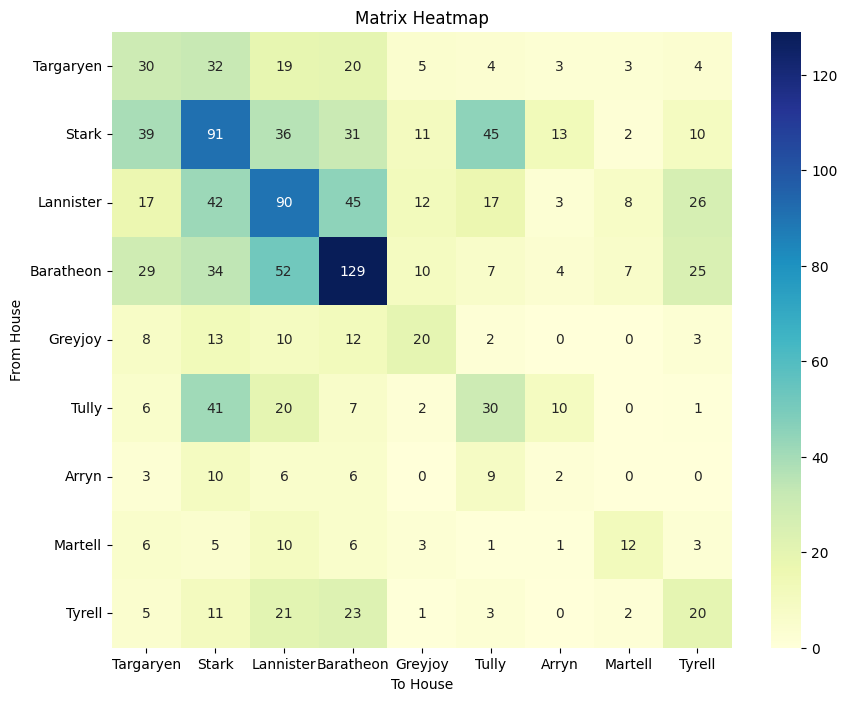

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Matrix Heatmap')
plt.xlabel('To House')
plt.ylabel('From House')
plt.show()

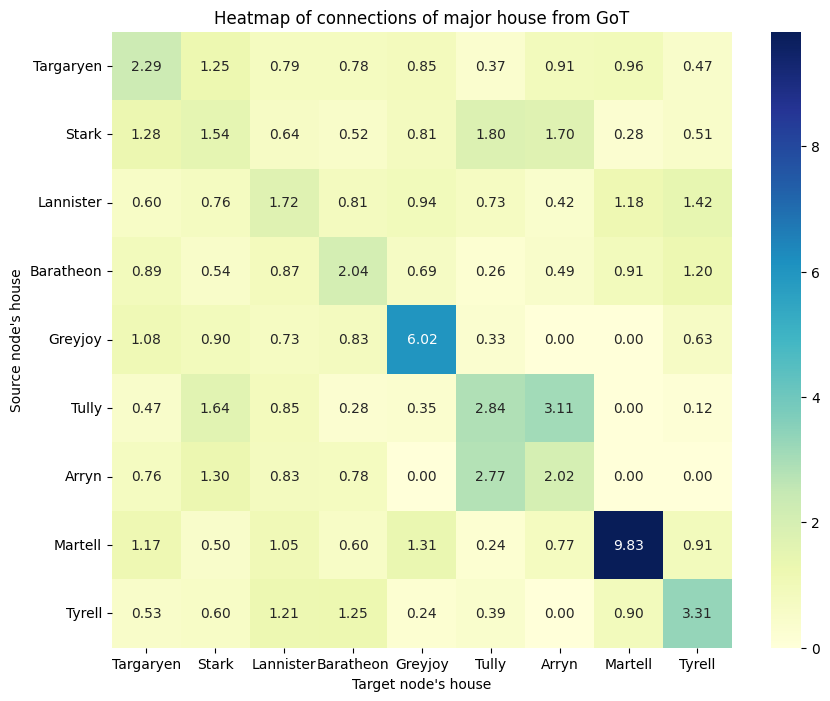

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(stand_heatmap_data, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Heatmap of connections of major house from GoT')
plt.xlabel("Target node's house")
plt.ylabel("Source node's house")

#plt.savefig("got-houses-heatmap.png")

plt.show()